### Homework I 
Not graded, just a warm up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from numpy import random 
random.seed(42)

In [3]:
# birth weight data
df = pd.read_csv('../data/BirthWeights.csv')
df.head()

,Unnamed: 0,gender,dbirwt
0,1,male,2551
1,2,male,2778
2,3,female,2976
3,4,female,3345
4,5,female,3175


### Tasks

1. Remove weights below 500 and above 8000
2. Plot overlaying densities of weight for male/female 
3. Take repeated (M=500) random sample of size n=10,40,160,640
    Repeat the above density plot for the sample mean distribution
    Compute the stdevs for the sample means of each gender separately
4. Make the above a function (arguments with default values: M=500,n=10)
5. Verify the SEM =$\sigma_{\bar{x}} = \sigma/\sqrt{n}$ law 

In [5]:
#Remove weights below 500 and above 8000
df_cleaned = df[np.logical_and(df.dbirwt > 500, df.dbirwt < 8000)]

(0, 8000)

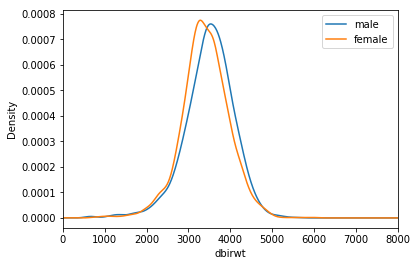

In [6]:
#Plot overlaying densities of weight for male/female
#Create an array with the unique values ('male' and 'female')
gender_iter = df_cleaned.gender.unique()

#Iterate over gender_iter
for v in gender_iter:
    #Create a data subset of the specific gender and plot afterwards
    subset = df_cleaned[df_cleaned.gender == v]
    subset.dbirwt.plot.density()
    
plt.legend(gender_iter)
plt.xlabel('dbirwt')
plt.xlim(0, 8000)

In [15]:
#Make the above a function (arguments with default values: M=500,n=10)
def mean_density_comparison(M=500, n=10):
    
    #Generate an gender iteration array
    gender_iter = ['male', 'female']
    
    #Create an empty DataFrame with 'gender' and 'dbirwt' column
    columns = ['gender', 'dbirwt']
    df_new = pd.DataFrame(columns=columns)
    
    #Create an empty array to store the standard deviation of the differnt gender 'male' = std_dev[0], 'female' = std_dev[1]
    std_dev = np.empty(2)
    
    #Iterate over gender and create a specific data subset
    for ind,v in enumerate(gender_iter):
        subset = df_cleaned[df_cleaned.gender == v]
        
        #create M random sample means of n samples and add it to df_new
        for i in range(M):
            rand_samples = np.random.choice(subset.dbirwt, n)
            x = np.mean(rand_samples)
            df_new.loc[len(df_new)+1] = [v, x]
        
        #plot male and female data and calculate the standard daviation of the data
        plot_data = df_new[df_new.gender == v]
        std_dev[ind] = np.std(plot_data['dbirwt'])  
        
        plot_data.dbirwt.plot.density()
        plt.xlabel('dbirwt')
        plt.legend(gender_iter)
    #return the sample mean data
    return df_new
    #return the standard daeviation of ['male', 'female']
    #return std_dev
        

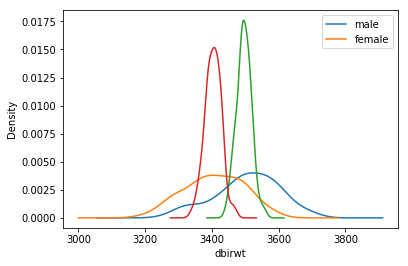

In [22]:
#Test the function
SM40 = mean_density_comparison(M=100, n=40)
SM640 = mean_density_comparison(M=100, n=640)
#np.std(SM)

In [23]:
SM40.head()
grouped = SM40["dbirwt"].groupby(SM40["gender"])
print(grouped.mean())
print(grouped.std())


gender
female    3407.13975
male      3505.45350
Name: dbirwt, dtype: float64
gender
female    88.460578
male      96.131110
Name: dbirwt, dtype: float64


567.1115873564374
589.2193747084959
184.1960175730192 186.3275265579058
178.12219885584165 179.33643035198904
130.89983399821412 131.75345755081173
129.6467478670792 126.81000601568043
106.83498834503827 107.57624761564406
99.85717467153886 103.53993633922745
92.24199185295161 93.1637632789529
91.28433157967201 89.66821517599452
80.47980354850773 83.32820309257495
81.15585325507948 80.2016898218408
75.94968066212584 76.06789418362507
74.76477736631362 73.21379110909116
68.96543705032282 70.42518538257166
63.6197178202302 67.78279938934553
65.6825156421926 65.87672877540587
66.67702531952065 63.405003007840214
63.051037388785076 62.109175519301935
56.52344092623199 59.778810117329684
59.53566571167574 58.92193747084959
58.187883863701394 56.71115873564374


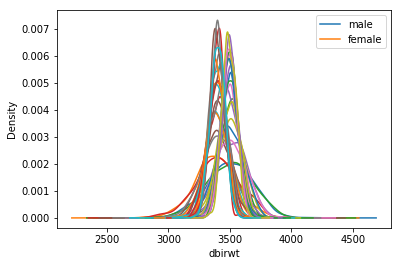

In [13]:
#Verify the SEM =σ(x_mean)=σ/√¯n law 

#calculate σ per gender
std_fem = np.std(df_cleaned.dbirwt[df_cleaned.gender=='female'])
std_male = np.std(df_cleaned.dbirwt[df_cleaned.gender=='male'])
print(std_fem)
print(std_male)

# n Verification list
n = [10,20,30,40,50,60,70,80,90,100]

#Compare statistical standard deviation of the sample distribution with n random samples to the quotient of real σ divided by √¯n
for i, v in enumerate(n):
    #Male
    print(mean_density_comparison(M=500, n=v)[0], std_male/np.sqrt(v))
    #Female
    print(mean_density_comparison(M=500, n=v)[1], std_fem/np.sqrt(v))